In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
dataset = pd.read_csv('../data/raw/iris.csv')
dataset.shape

(150, 5)

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# feature names
feature_names = dataset.columns.tolist()[:4]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
# iris species
species = dataset['species'].unique().tolist()
species

['setosa', 'versicolor', 'virginica']

# Features engineering

In [6]:
dataset['sepal_length_to_sepal_width'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_length_to_petal_width'] = dataset['petal_length'] / dataset['petal_width']

# dataset['sepal_length_in_square'] = dataset['sepal_length'] ** 2
# dataset['sepal_width_in_square'] = dataset['sepal_width'] ** 2
# dataset['petal_length_in_square'] = dataset['petal_length'] ** 2
# dataset['petal_width_in_square'] = dataset['petal_width'] ** 2

dataset = dataset[[
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
#     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
    'sepal_length_to_sepal_width', 'petal_length_to_petal_width',
    'species'
]]

In [7]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,species
0,5.1,3.5,1.4,0.2,1.457143,7.0,setosa
1,4.9,3.0,1.4,0.2,1.633333,7.0,setosa
2,4.7,3.2,1.3,0.2,1.468750,6.5,setosa
3,4.6,3.1,1.5,0.2,1.483871,7.5,setosa
4,5.0,3.6,1.4,0.2,1.388889,7.0,setosa


# Split dataset

In [8]:
test_size=0.2

## transform targets (species) to numerics

In [9]:
dataset.loc[dataset.species=='setosa', 'species'] = 0
dataset.loc[dataset.species=='versicolor', 'species'] = 1
dataset.loc[dataset.species=='virginica', 'species'] = 2

## Split in train/test

In [10]:
train_dataset, test_dataset = train_test_split(dataset, test_size=test_size, random_state=42)
train_dataset.shape, test_dataset.shape

((120, 7), (30, 7))

# Train

In [11]:
# Get X and Y
Xtrain, Ytrain = train_dataset.loc[:, 'sepal_length':'petal_length_to_petal_width'].values, train_dataset.loc[:, 'species'].values
Xtrain = Xtrain.astype("float32")

In [12]:
# Create an instance of Logistic Regression Classifier CV and fit the data.
logreg = LogisticRegression(C=0.001, solver='lbfgs', multi_class='multinomial', max_iter=100)
logreg.fit(Xtrain, Ytrain)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [14]:
Xtest, Ytest = test_dataset.loc[:, 'sepal_length':'petal_length_to_petal_width'].values, test_dataset.loc[:, 'species'].values
Xtest = Xtest.astype("float32")

In [15]:
prediction = logreg.predict(Xtest)
cm = confusion_matrix(prediction, Ytest)
f1 = f1_score(y_true=Ytest, y_pred=prediction, average='macro')

In [16]:
# f1 score value
f1

0.9305555555555555

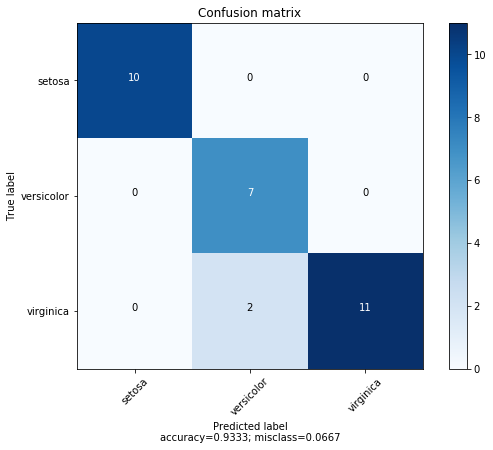

In [17]:
plot_confusion_matrix(cm, species, normalize=False)